Using GPU for processing.


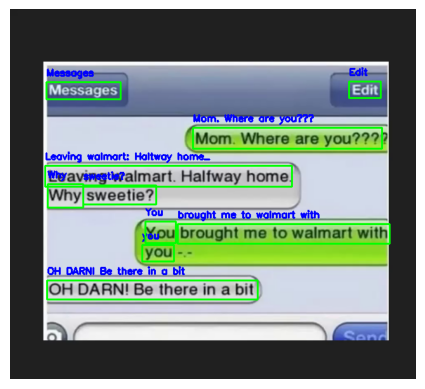

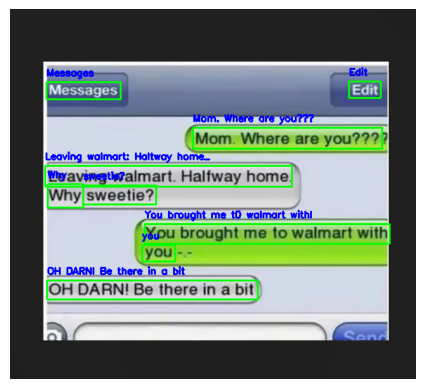

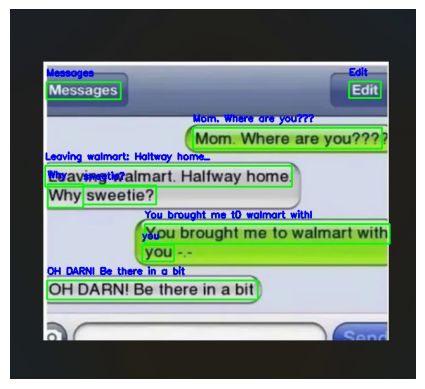

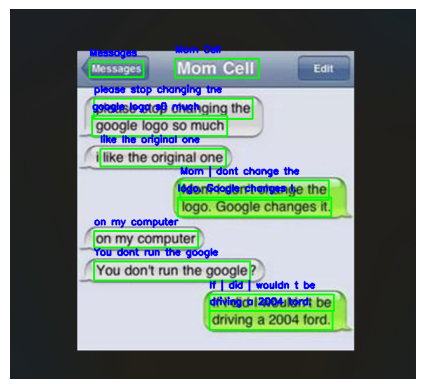

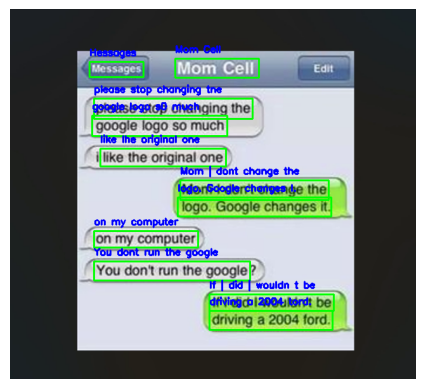

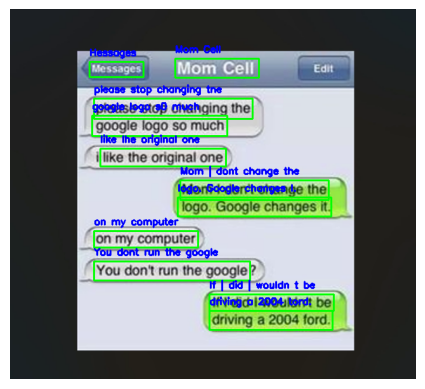

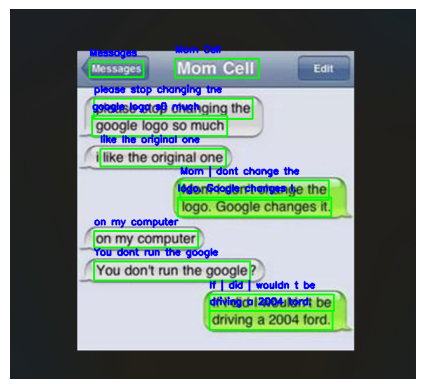

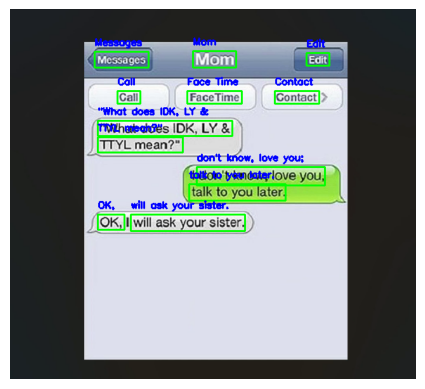

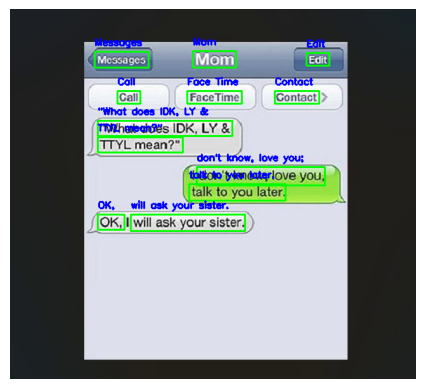

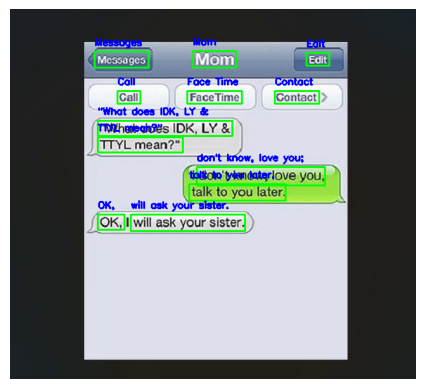

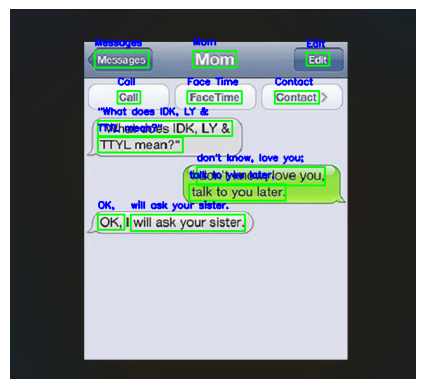

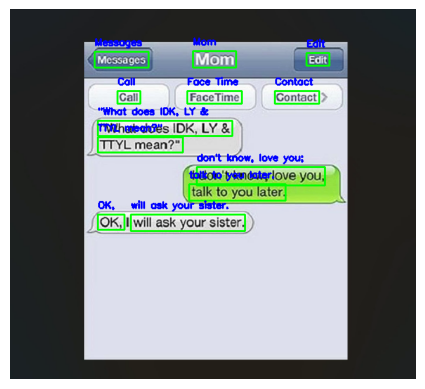

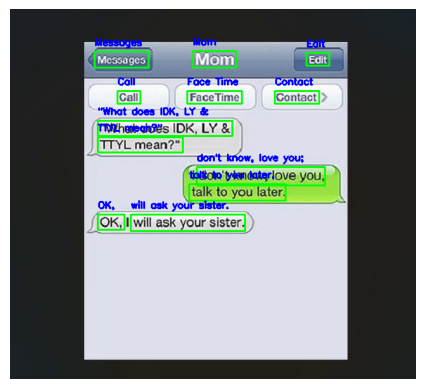

Processed 13 frames out of 129 in 5.34 seconds.
Effective FPS (GPU): 2.43


In [4]:
import cv2
import easyocr
import matplotlib.pyplot as plt
import time

# Configure whether to use CPU or GPU for processing
USE_CPU = False  # Set to True for CPU, False for GPU

# Select processing mode
if USE_CPU:
    use_gpu = False
    print("Using CPU for processing.")
else:
    use_gpu = True
    print("Using GPU for processing.")

# Initialize EasyOCR reader with the selected mode
reader = easyocr.Reader(['en'], gpu=use_gpu)

# Video file path
video_path = 'Demo_video.mp4'

# Open video
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Unable to open video file.")
    exit()

# Set frame rate to process every nth frame
frame_rate = 10  # Process every 10th frame
frame_count = 0
processed_frame_count = 0

# Target frame width for resizing (maintains aspect ratio)
resize_width = 640

# Start timer for performance evaluation
start_time = time.time()

while cap.isOpened():
    ret, frame = cap.read()

    # If unable to read the frame, break the loop
    if not ret:
        break

    # Process the frame at the specified frame rate
    if frame_count % frame_rate == 0:
        # Resize frame to target width
        height, width, _ = frame.shape
        scale = resize_width / width
        resized_frame = cv2.resize(frame, (resize_width, int(height * scale)))

        try:
            # Perform OCR
            ocr_results = reader.readtext(resized_frame, detail=1)

            # Draw bounding boxes and annotate text
            for bbox, text, score in ocr_results:
                if score > 0.25:  # Confidence threshold
                    p1 = tuple(map(int, bbox[0]))
                    p2 = tuple(map(int, bbox[2]))
                    cv2.rectangle(resized_frame, p1, p2, (0, 255, 0), 2)
                    cv2.putText(resized_frame, text, (p1[0], p1[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

            # Display the frame (optional)
            plt.imshow(cv2.cvtColor(resized_frame, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.show()

        except RuntimeError as e:
            print(f"RuntimeError during OCR: {e}")

        # Count the processed frames
        processed_frame_count += 1

    # Increment the total frame count
    frame_count += 1

# Release the video capture object
cap.release()

# Calculate and display performance metrics
end_time = time.time()
elapsed_time = end_time - start_time
fps = processed_frame_count / elapsed_time

print(f"Processed {processed_frame_count} frames out of {frame_count} in {elapsed_time:.2f} seconds.")
print(f"Effective FPS ({'CPU' if USE_CPU else 'GPU'}): {fps:.2f}")
